# Introduction

Depending on the application, a small increase in machine learning model performance can provide a significant benefit for an organization. For example, a manufacturing company may use machine learning to classify if a piece of equipment will fail within the next two weeks. In manufacturing, an unexpected failure on a piece of equipment can result in unplanned outages, production delays, and lost revenue. Therefore, a small increase of only 5% in model performance could lead to a significant increase in overall business performance. 

With this in mind, one of the biggest questions for a machine learning engineer or a data scientist is how model performance can be improved. While there are a number of ways to improve model performance, a common method is through tuning hyperparameters. The process of tuning hyperparameters will be demonstrated on the "Make Moons" dataset using a decision tree for classification. The general approach will be to compare the performance of a decision tree classifier with the default hyperparameters with the performance of a decision tree classifier with tuned hyper parameters. All machine learning modules and data sets were sourced from sklearn. The final result demonstrated that using tuned hyperparameters, model accuracy increased by about 5%, precision increased by about 8%, and recall increased by about 4%. 

# Problem Statement 

Hyperparameters are the specific inputs for how a machine learning model will execute on a set of data. They provide a foundation for the model to build the specific parameters needed to evaluate a data set. For example, a hyper parameter could be the maximum allowable number of leaf nodes in a decision tree. If this value was set to 100, then it is still possible that the model would evaluate 75 leaf nodes to be the correct number based on the training data However, if the model tried to continue to add leave nodes after 100, then the hyperparameter setting would prevent it from doing so.

The general workflow for this demonstration is as follows:

1. Import the make moons dataset from sklearn
2. Evaluate decision tree classification model performance using default hyperparameters 
3. Use grid search to determine the optimal hyperparameters
4. Test decision tree classifier with optimal hyperparameters 
5. Analyze and summarize the results. 

The hyperparameters evaluated are for the decision tree classifier algorithm. A decision tree classifier is a machine learning algorithm that determines what the predicted output should be for a data point based upon a series of logic checks it developed based upon the training data. A visual representation of a decision tree is shown below: 

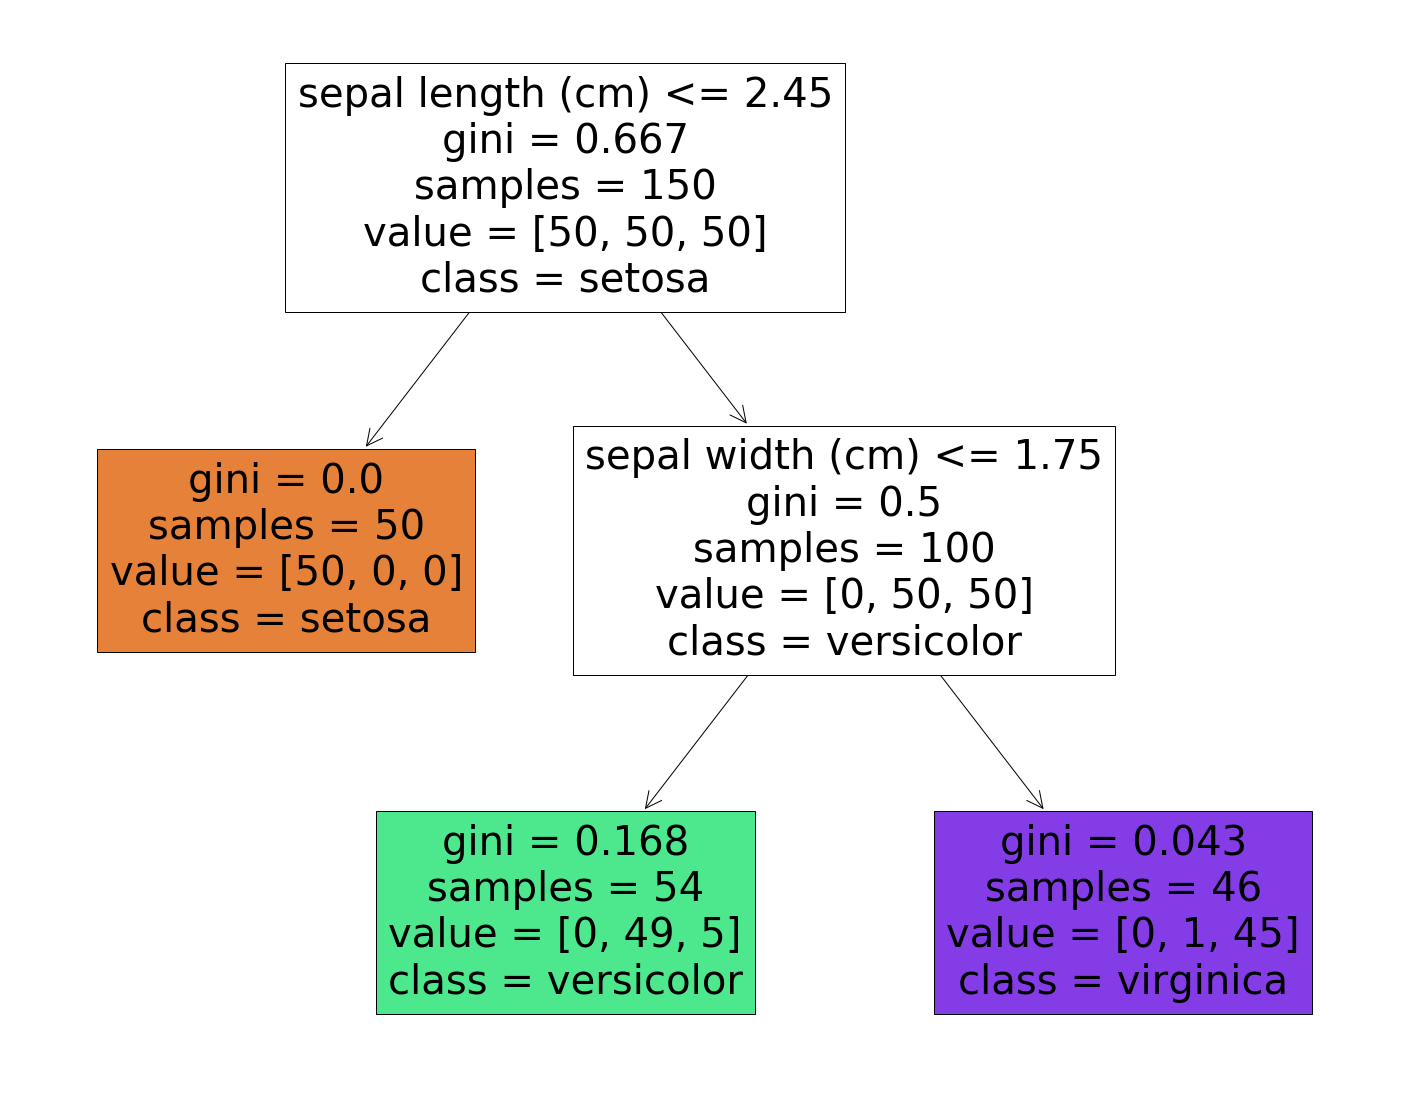

The decision tree classifier has a number of hyperparameters, but the ones evaluated in this demonstration are criterion, maximum features, maximum leaf nodes, minimum samples split, and splitter. The criterion is the loss function that determines the quality of a split, and the inputs are either "gini" for the Gini impurity function or "entropy" for the Shannon information gain. The maximum number of features hyper parameter describes the maximum number of features that can be used to determine a split. The maximum leaf nodes are the number of leaves allowed in the model. The splitter is the strategy to determine a split in a node, either the strategy is to use the best split or the best random split. 

# Experimental Evaluation 

Since this is a classification problem, a number of methods will be used to determine the best performing model. Accuracy, precision, and recall will be the specific metrics used to describe model performance, and the confusion matrix will be evaluated to give additional context to the metrics. Accuracy is the total number of correct predictions over the total number of predictions. However, this metric needs to be understood in the greater context of how many false positives and how many false negatives were observed? This is where precision and recall are utilized. Precision describes how often a model incorrectly classified something as positive. While recall describes how often a model incorrectly classified something as negative. The equations for precision and recall are shown below.

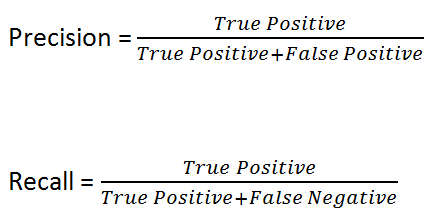
 
The inputs for this problem come from Make Moons dataset in sklearn. This data set is a considered more of a toy dataset in that its main purpose is for evaluating different machine learning algorithms and providing an organized data set for educational purposes. The data is a set of two half-moons that have a number of data points graphed in a "swirl" shape, and the corresponding class being labeled. An example image of the Make Moons dataset is shown below: 

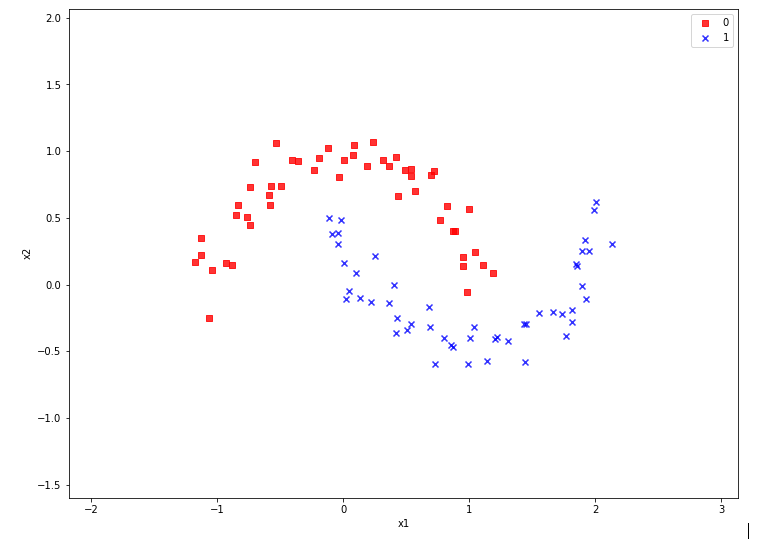

The inputs will be the coordinates of each point, and the outputs are the binary classification of the corresponding class. 


# Data Preprocessing

Since the data is sourced from sklearn and already organized, there is minimal preprocessing required. The only steps needed to prepare the data for modeling is as follows:

1. Import data from sklearn
2. Split data into training and testing sets 

In [62]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

moon_data = make_moons(n_samples = 10000, noise=0.4, random_state = 42)

X = moon_data[0]
y = moon_data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, 
                                                    stratify = y, random_state = 42)

# Model Evaluation

Comparing the model default hyperparameters to the optimal parameters the model performance improved noticeably. The model accuracy increased by about 5%, precision increased by about 7%, and recall increased by about 4%. 

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

First the default hyperparameters are used to evaluate the data set. The model performance had an accuracy of about 80%, precision of about 81%, and recall of about 80%. 

Then the optimal hyperparameters are determined using the grid search method. 

In [64]:
dt_clf = DecisionTreeClassifier(random_state = 42)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_train)

score = cross_val_score(dt_clf, X_train, y_train, cv =3)
precision = cross_val_score(dt_clf, X_train, y_train, cv = 3, scoring = "precision")
recall = cross_val_score(dt_clf, X_train, y_train, cv = 3, scoring = "recall")

print(f'Decision Tree training accuracy: {round(score.mean(), 4)}')
print(f'Decision Tree trianing precision: {round(precision.mean(), 4)}')
print(f'Decision Tree training recall: {round(recall.mean(), 4)}')

criterion = ["gini", "entropy"]
max_leaf_nodes = [10, 20, 30, 35, 40, 45, 50, 75, 100]
max_features = ['sqrt', 'log2']
splitter = ["best", "random"]
min_samples_split = [1, 10, 100, 500, 750, 1000]
# define grid search
grid = dict(criterion=criterion, 
            max_leaf_nodes=max_leaf_nodes, 
            min_samples_split = min_samples_split, 
            splitter = splitter, 
            max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

best_dt_clf = grid_result.best_estimator_

Decision Tree training accuracy: 0.8021
Decision Tree trianing precision: 0.8039
Decision Tree training recall: 0.7993
Best: 0.859214 using {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_split': 500, 'splitter': 'best'}


In [65]:
best_dt_clf.fit(X_train, y_train)
y_pred = best_dt_clf.predict(X_test)

score = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
cf = confusion_matrix(y_pred, y_test)

print(f'Decision Tree test accuracy: {round(score.mean(), 4)}')
print(f'Decision Tree test precision: {round(precision, 4)}')
print(f'Decision Tree test recall: {round(recall, 4)}')
print(cf)

Decision Tree test accuracy: 0.8575
Decision Tree test precision: 0.888
Decision Tree test recall: 0.8369
[[827 112]
 [173 888]]


Using the tuned hyperparameters, the model performance improved. The accuracy is about 86%, the precision is about 89% and the recall is about 84%. 

# Conclusion

In conclusion, it was confirmed that through using optimal hyperparameters the model performance was increased. The model accuracy increased by about 5%, precision increased by about 8%, and recall increased by about 4%. 